In [1]:
# 回帰分析

# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
# データの取得
df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


In [3]:
# 　回帰分析
# →因果関係が疑われる複数の変数を使って、
#  　　ある変数から他の変数の値を予測する手法
# このとき、
# ・説明変数(独立変数)→原因となる変数
# ・応答変数(従属変数)→結果となる変数

# 単回帰モデル
# →説明変数と応答変数が1つずつの最も単純なモデル

# 今回は、
# ・説明変数→「小テストの平均点」
# ・応答変数→「期末テストの点数」
# とする
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

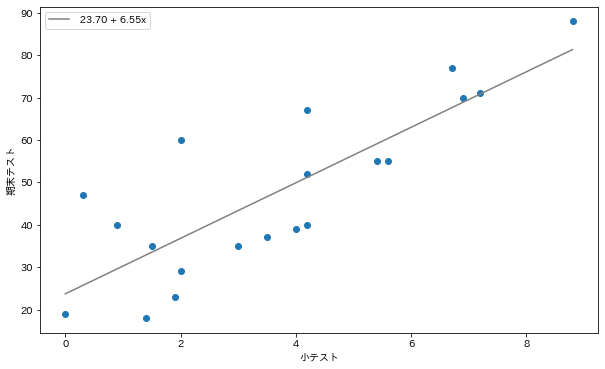

In [4]:
# この2次元データについて、散布図と回帰直線を描画する
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('小テスト')
ax.set_ylabel('期末テスト')
ax.plot(xs, ys, color='gray',
             label=f'{poly_fit[1]: .2f} + {poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [5]:
# 誤差項→予測できない確率的な部分
# 回帰分析では以下の2つを仮定する
# ・説明変数は確率変数ではない
#・誤差項εは互いに独立にN(0, σ^2)に従う

# statsmodelsによる回帰分析
# →Pythonで動く解析ツールらしい
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           8.59e-06
Time:                        20:12:17   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 最小2乗法
# データに対して残差をとっていき、その総和が最も小さくなるように係数を決める
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 最小2乗法を行う(Numpy)
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/Users/yuya/.pyenv/versions/anaconda3-2020.07/envs/pyst/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(23.69949534673122, 6.553732606043082)

In [8]:
# 残差の分散から母分散σ^2を推定する
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [9]:
# 今回は回帰係数の数が2なので、
# 自由度はn-2
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

In [10]:
# β0、β1の区間推定
# Numpyで求める
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [11]:
# 標準誤差を求める
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

In [12]:
# 95%信頼区間を自由度n-2のt分布を使って求める
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796091272760252, 33.60289942070219)

In [13]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125889, 8.798744574960274)

In [14]:
# t検定
# ・帰無仮説: β1 = 0
#・対立仮説: β0 ≠ 0
#
# 帰無仮説が棄却される(β0 ≠ 0である事が示される)ことで、
# 説明変数が応答変数に影響を与えている事が主張できる
# (β0=0だと変数xの項が消えてしまうので)
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [15]:
# p値を求める
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [16]:
# β0についても同様に仮説検定を行う
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [17]:
# p値を求める
(1 - rv.cdf(t)) * 2

8.745298393209033e-05

In [18]:
# 重回帰モデル
# →説明変数が複数あるモデル
# まずはp=2として、説明変数に小テストとテスト前日の睡眠時間を使うモデルを考える
formula = '期末テスト ~ 小テスト + 睡眠時間'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           6.19e-06
Time:                        20:12:17   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト           6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間           4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# 重回帰モデルにおける回帰係数をNumpyで求める
x1 = df['小テスト']
x2 = df['睡眠時間']
y = df['期末テスト']
p = 2

In [20]:
# 最小2乗法を用いて係数を求める
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

/Users/yuya/.pyenv/versions/anaconda3-2020.07/envs/pyst/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(-1.8709143470995908, 6.42887834300237, 4.191706546398685)

In [21]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [22]:
# 標準誤差を求める
s_var = np.sum(eps_hat ** 2) / (n - p -1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [23]:
# 睡眠時間の係数:β2の95%信頼区間を求める
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.440253332543481, 7.943159760253889)

In [24]:
# ダミー変数
# 質的変数を変換して量的変数と同様に扱えるようにする手法
formula = '期末テスト ~ 小テスト + 睡眠時間 + 通学方法'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.47e-05
Time:                        20:12:17   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4788     12.068     -0.040      0.969     -26.202      25.244
通学方法[T.徒歩]     -5.8437      5.447     -1.073      0.300     -17.453       5.766
通学方法[T.自転車]     1.8118      6.324      0.286      0.778     -11.668      15.292
小テスト            6.0029      1.033      5.809      0.000       3.800       8.206
睡眠時間            4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# モデルの選択
# 良いモデルとはどんなモデルか?という事を考えた時に、
# 以下の2点が挙げられる
# ・当てはまりの良さ→モデルが手元にあるデータにどれだけ適合しているか
# ・予測の良さ→モデルが未知のデータをどれだけの精度で予測できるか
#
# 説明変数を増やせば、当てはまりの良さは向上するが、予測精度が下がってしまう
# このことを過学習と呼ぶ

x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

result = smf.ols('期末テスト ~ 小テスト', df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           8.59e-06
Time:                        20:20:50   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# 予測値
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [29]:
# 残差
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [30]:
# 残差二乗和
np.sum(eps_hat ** 2)

2417.227825229262

In [33]:
# 全変動→観測値yiがどれだけばらついているかという指標
# 回帰変動→予測値yiが観測値の平均値yに対してどれだけばらついているかという指標
# 残差変動→残差のばらつきを表す指標。(残差二乗和と同じ)
#
# 全変動 = 回帰変動 + 残差変動
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [34]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [35]:
# 決定係数を求める
exp_var / total_var

0.6763457665504996

In [36]:
# 単回帰の決定係数は、
# 説明変数と応答変数の相関係数の二乗に一致する事がしられている。
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504998

In [37]:
# 説明変数の数が増えると、決定係数の値は上がる
# よってある程度以上の説明力がない変数の文は値が増加しない様に調整を行う
# 自由度調整済み決定係数
1 - (unexp_var  / (n-p-1)) / (total_var / (n-1))

0.6583649758033057